# Classification

In this notebook, I'll use classification algorithms on Social Network dataset. I'll use two key features, `Age` and `Estimated Salary`.

Let's begin by taking a look at the files in the directory.

In [1]:
!ls

C:\Users\apavlides\Documents\OddsEnds\cap_graph.pdf
Classification.ipynb
Social_Network_Ads.csv


There are two files. `Classification.ipynb` is this notebook and `Social_Network_Ads.csv` is the dataset.

### Import libraries and dataset

I'll import the necessary libraries to work with the dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import rcParams

%matplotlib inline
warnings.filterwarnings('ignore')

I'll read the data into the variable `dataset` and extract the training and test data.

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = dataset.iloc[:, 2:-1]
y = dataset.iloc[:, -1]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0, test_size = 0.25)

As the two features are of varied scale, it is a good measure to scale them down. I'll use the `StandardScaler` subpackage from `sklearn.preprocessing`.

In [5]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(train_X)
train_X = standardScaler.transform(train_X)
test_X = standardScaler.transform(test_X)

### Logistic Regression

I'll import the LogisticRegression model from `sklearn.linear_model`. I'll train it with the training data and test the accuracy using `accuracy_score` metric. I'll also use the confusion matrix to draw meaningful information from the same.

In [6]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()
logisticRegression.fit(train_X, train_y)
logisticRegression_pred = logisticRegression.predict(test_X)
print("Accuracy: {0:.2f}%".format(accuracy_score(test_y, logisticRegression_pred)*100))

Accuracy: 89.00%


In [7]:
confusion_matrix(test_y, logisticRegression_pred)

array([[65,  3],
       [ 8, 24]])

I can infer that our model predicted **65 + 24 = 89** outputs correctly.

#### Visualization

The subpackage `ListedColormap` from `sklearn.colors` allows me to create a ColorMap from a list of colors. As I am working with two classes, I'll need a list of two colors. I'll choose them as `red` and `green`.

In [8]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'green'])

I'd like to create boundaries for the two classes using prediction from the model. I'll first use `meshgrid` to get the x and y coordinates for the various points. Based on two arrays, we can get a matrix which represents the complete grid described by them. Read more: https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

In [9]:
arr_1 = np.arange(start = test_X[:, 0].min(), stop = test_X[:, 0].max(), step = 0.01)
arr_2 = np.arange(start = test_X[:, 1].min(), stop = test_X[:, 1].max(), step = 0.01)

We subtract `1` from the minimum and add `1` to maximum to increase our area of plotting.

In [10]:
arr_1 = np.arange(start = test_X[:, 0].min() - 1, stop = test_X[:, 0].max() + 1, step = 0.01)
arr_2 = np.arange(start = test_X[:, 1].min() - 1, stop = test_X[:, 1].max() + 1, step = 0.01)

In [11]:
x_coords, y_coords = np.meshgrid(arr_1, arr_2)

#### Understanding contourf

Once I have the coordinates for the various points on the plot, I can use `contourf` to create filled contour plots. These plots expect the first two values as X and Y coordinates. They also accept Z in case we need to draw 3D contours. So, in this case, we'll use out predictions as the Z value. The parameter `alpha` defines the opacity and `cmap` defines the color. 

Let's start by considering an example.

In [12]:
ex = np.array(
     [[0.25, 0.5],
      [0.75, 1]])
ey = np.array(
     [[0.25, 0.5],
      [0.75, 1]])

We can flatten an array using `ravel()`.

In [13]:
ex_flatten = ex.ravel()
ey_flatten = ey.ravel()
print(ex_flatten)
print(ey_flatten)

[0.25 0.5  0.75 1.  ]
[0.25 0.5  0.75 1.  ]


Now, let's combine them together and create a numpy array.

In [14]:
combined_arr = np.array([ex_flatten, ey_flatten])
print(combined_arr)

[[0.25 0.5  0.75 1.  ]
 [0.25 0.5  0.75 1.  ]]


But our model expects the input in its transpose form, so I will now take a transpose and feed it into the predictor.

In [15]:
sample_prediction = logisticRegression.predict(combined_arr.T)
print(sample_prediction)

[0 1 1 1]


Amazing! We got our prediction for the mesh. However, this is not in a matrix form for the `countorf` to use, so I will convert it into the same using the `reshape` method.

In [16]:
sample_prediction.reshape(ex.shape)

array([[0, 1],
       [1, 1]])

I now have the predictions in the correct format. I can color them differently based on their predicted value as Z axis.

#### Back to Visualization

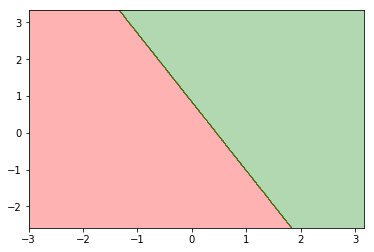

In [17]:
plt.contourf(x_coords, 
             y_coords, 
             logisticRegression.predict(np.array([x_coords.ravel(), y_coords.ravel()]).T).reshape(x_coords.shape),
             alpha = 0.3, 
             cmap = cmap)

I now have the area split based on the prediction values. Now, I can plot the actual results and see where they land.

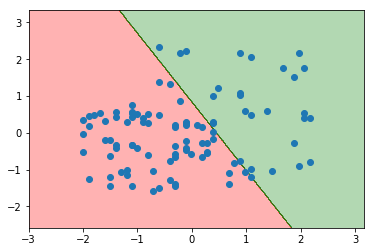

In [18]:
plt.contourf(x_coords, 
             y_coords, 
             logisticRegression.predict(np.array([x_coords.ravel(), y_coords.ravel()]).T).reshape(x_coords.shape),
             alpha = 0.3, 
             cmap = cmap)
plt.scatter(test_X[:, 0], test_X[:, 1])

We aren't sure if we correctly predicted anything or not as the color is same for all. Let's color them based on their class and see the end result.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


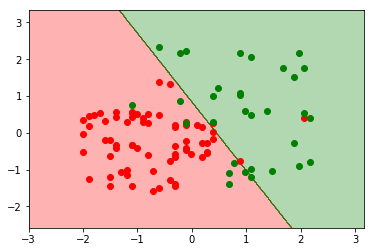

In [19]:
plt.contourf(x_coords, 
             y_coords, 
             logisticRegression.predict(np.array([x_coords.ravel(), y_coords.ravel()]).T).reshape(x_coords.shape),
             alpha = 0.3, 
             cmap = cmap)
for i, j in enumerate(np.unique(test_y)):
    # i -> index, j -> class
    plt.scatter(test_X[j == test_y, 0], test_X[j == test_y, 1],
                c = cmap(i), label = j)

We can see that our algorithm was able to predict majority of the values correctly.

### Visualization Function

I'll just combine all the information described above into an easy to use function.

In [20]:
def visualise_algo(classifier):
    arr_1 = np.arange(start = test_X[:, 0].min() - 1, stop = test_X[:, 0].max() + 1, step = 0.01)
    arr_2 = np.arange(start = test_X[:, 1].min() - 1, stop = test_X[:, 1].max() + 1, step = 0.01)
    x_coords, y_coords = np.meshgrid(arr_1, arr_2)
    rcParams['figure.figsize'] = 12, 8
    plt.contourf(x_coords, 
                 y_coords, 
                 classifier.predict(np.array([x_coords.ravel(), y_coords.ravel()]).T).reshape(x_coords.shape),
                 alpha = 0.3, 
                 cmap = cmap)
    for i, j in enumerate(np.unique(test_y)):
        plt.scatter(test_X[j == test_y, 0], test_X[j == test_y, 1],
                    c = cmap(i), label = j)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.title('Plot Purchased')
    plt.legend()

### Accuracy Function

I've combined the process of fitting the classifier and getting accuracy in a function.

In [21]:
def accuracy(clf):
    clf.fit(train_X, train_y)

    clf_pred = clf.predict(test_X)
    print("Accuracy: {0:.2f}%".format(accuracy_score(test_y, clf_pred)*100))
    return clf

### K Nearest Neighbors

Accuracy: 93.00%


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


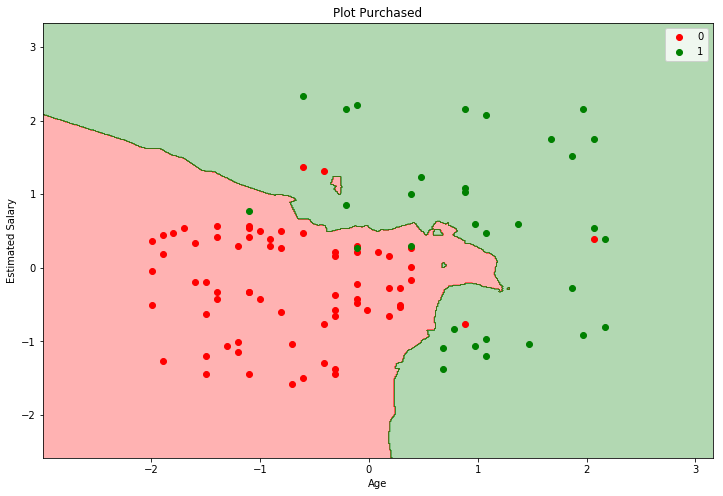

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kNeighborsClassifier = KNeighborsClassifier()
kNeighborsClassifier = accuracy(kNeighborsClassifier)
visualise_algo(kNeighborsClassifier)

### Support Vector Classifier

Accuracy: 90.00%


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


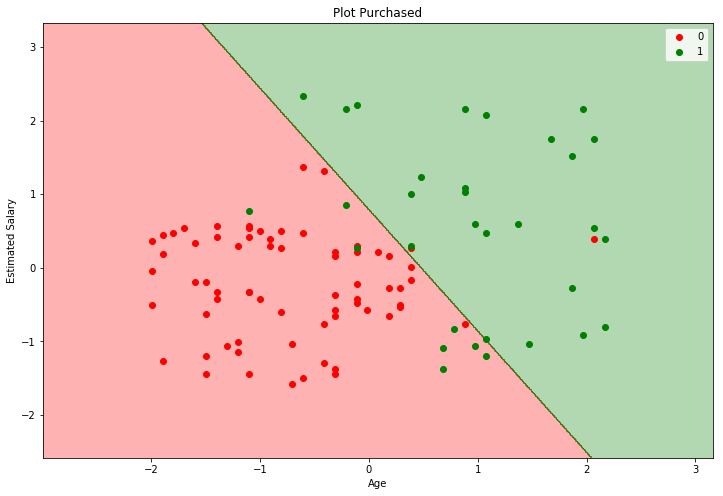

In [23]:
from sklearn.svm import SVC
supportVectorClassifier = SVC(kernel = 'linear')
supportVectorClassifier = accuracy(supportVectorClassifier)
visualise_algo(supportVectorClassifier)

Accuracy: 86.00%


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


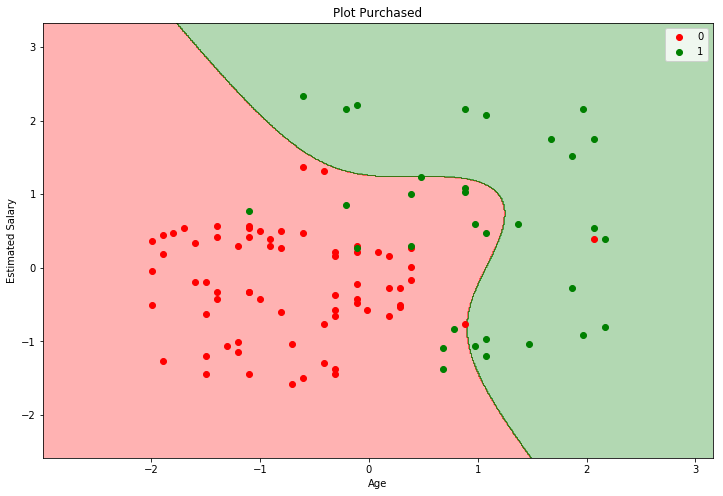

In [24]:
from sklearn.svm import SVC
supportVectorClassifier = SVC(kernel = 'poly')
supportVectorClassifier = accuracy(supportVectorClassifier)
visualise_algo(supportVectorClassifier)

Accuracy: 74.00%


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


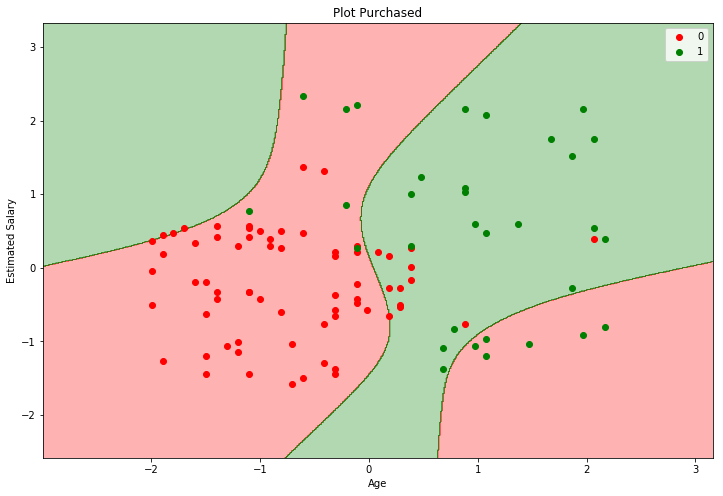

In [25]:
from sklearn.svm import SVC
supportVectorClassifier = SVC(kernel = 'sigmoid')
supportVectorClassifier = accuracy(supportVectorClassifier)
visualise_algo(supportVectorClassifier)

Accuracy: 93.00%


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


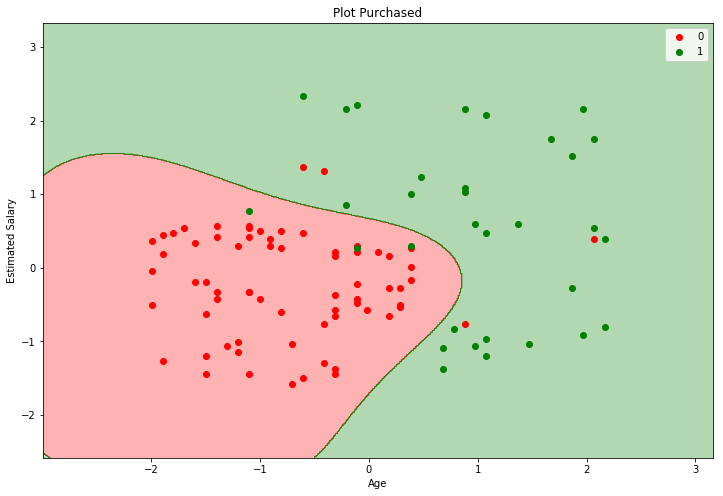

In [26]:
from sklearn.svm import SVC
supportVectorClassifier = SVC(kernel = 'rbf', probability = True)
supportVectorClassifier = accuracy(supportVectorClassifier)
visualise_algo(supportVectorClassifier)

It appears that the Support Vector Classifier with `rbf` kernel produced the best accuracy.

### Naive Bayes

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Accuracy: 90.00%


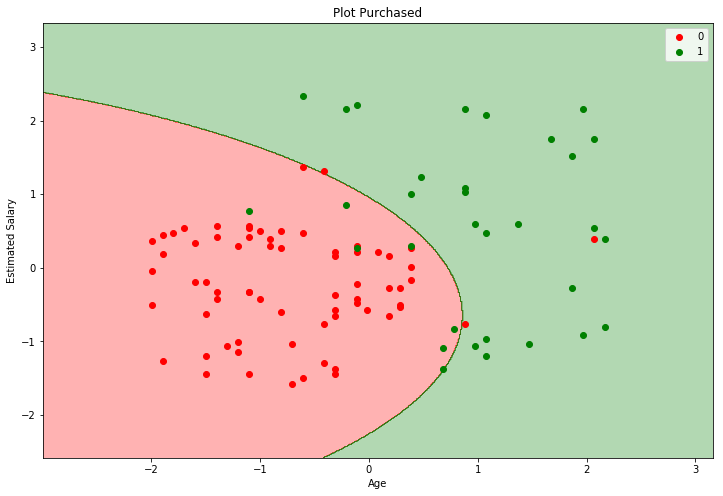

In [27]:
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB()
naiveBayes = accuracy(naiveBayes)
visualise_algo(naiveBayes)

### Decision Tree Classifier

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Accuracy: 90.00%


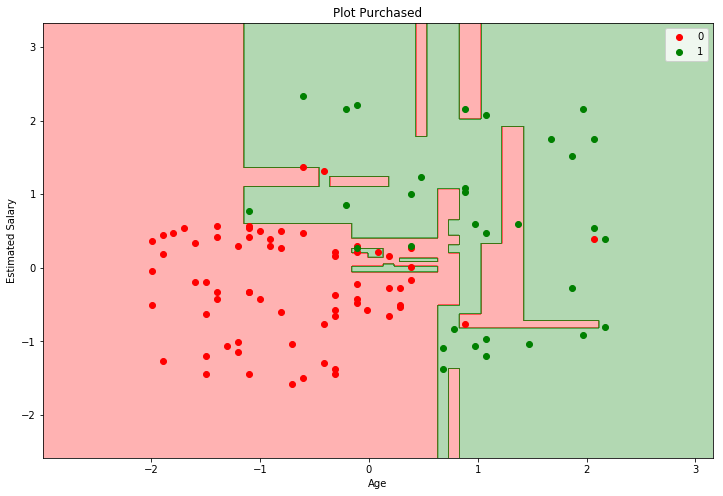

In [28]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = DecisionTreeClassifier()
decisionTreeClassifier = accuracy(decisionTreeClassifier)
visualise_algo(decisionTreeClassifier)

The regions are very varied. It appears that the classifier tried to read all points and as a result, it appears to have overfit on the data.

### Random Forest Classifier

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Accuracy: 92.00%


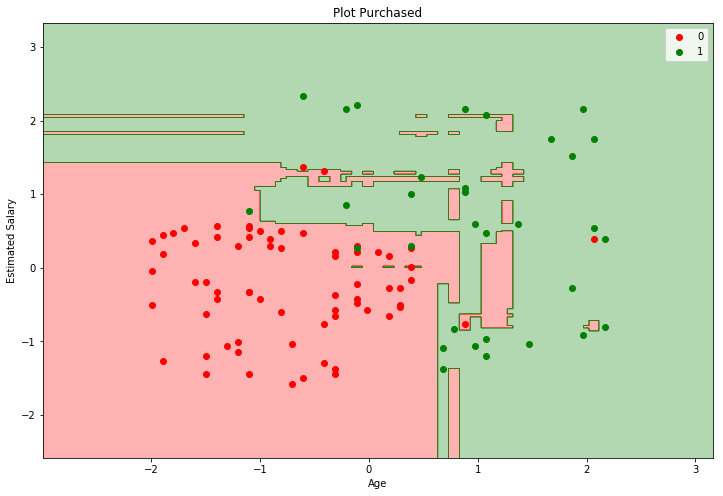

In [29]:
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier = RandomForestClassifier()
randomForestClassifier = accuracy(randomForestClassifier)
visualise_algo(randomForestClassifier)

Again, it appears that the classifier has overfit on the data.

# Metrics

Now, that the algorithms have made their classification predictions, I'll use different metrics to evaluate the models.

### Confusion Matrix

In [30]:
print("Logistic Regression")
print(confusion_matrix(test_y, logisticRegression.predict(test_X)))
print("K Neighbors Classifier")
print(confusion_matrix(test_y, kNeighborsClassifier.predict(test_X)))
print("Support Vector Classifier (RBF)")
print(confusion_matrix(test_y, supportVectorClassifier.predict(test_X)))
print("Naive Bayes Classifier")
print(confusion_matrix(test_y, naiveBayes.predict(test_X)))
print("Decision Tree Classifier")
print(confusion_matrix(test_y, decisionTreeClassifier.predict(test_X)))
print("Random Forest Classifier")
print(confusion_matrix(test_y, randomForestClassifier.predict(test_X)))

Logistic Regression
[[65  3]
 [ 8 24]]
K Neighbors Classifier
[[64  4]
 [ 3 29]]
Support Vector Classifier (RBF)
[[64  4]
 [ 3 29]]
Naive Bayes Classifier
[[65  3]
 [ 7 25]]
Decision Tree Classifier
[[62  6]
 [ 4 28]]
Random Forest Classifier
[[65  3]
 [ 5 27]]


### Error Rate

Error rate is basically `1 - Accuracy`

In [31]:
print("Logistic Regression Error Rate: {0:.02f}%"
      .format((1 - accuracy_score(test_y, logisticRegression.predict(test_X)))*100))
print("K Neighbors Classifier Error Rate: {0:.02f}%"
      .format((1 - accuracy_score(test_y, kNeighborsClassifier.predict(test_X)))*100))
print("Support Vector Classifier (RBF) Error Rate: {0:.02f}%"
      .format((1 - accuracy_score(test_y, supportVectorClassifier.predict(test_X)))*100))
print("Naive Bayes Classifier Error Rate: {0:.02f}%"
      .format((1 - accuracy_score(test_y, naiveBayes.predict(test_X)))*100))
print("Decision Tree Classifier Error Rate: {0:.02f}%"
      .format((1 - accuracy_score(test_y, decisionTreeClassifier.predict(test_X)))*100))
print("Random Forest Classifier Error Rate: {0:.02f}%"
      .format((1 - accuracy_score(test_y, randomForestClassifier.predict(test_X)))*100))

Logistic Regression Error Rate: 11.00%
K Neighbors Classifier Error Rate: 7.00%
Support Vector Classifier (RBF) Error Rate: 7.00%
Naive Bayes Classifier Error Rate: 10.00%
Decision Tree Classifier Error Rate: 10.00%
Random Forest Classifier Error Rate: 8.00%


### ROC Curve

Read more about it: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

In [32]:
from sklearn.metrics import roc_curve, auc

def showRoc(classifiers, names, colors):
    plt.plot([0,1], [0,1], 'r--')
    for name, classifier, color in zip(names, classifiers, colors):
        probs = classifier.predict_proba(test_X)
        # Reading probability of second class
        probs = probs[:, 1]
        fpr, tpr, thresholds = roc_curve(test_y, probs)
        roc_auc = auc(fpr, tpr)
        clf_name = name + ' {0:.2f}'.format(roc_auc)
        plt.plot(fpr, tpr, c = color, label = clf_name)
        plt.legend(loc = 'lower right')

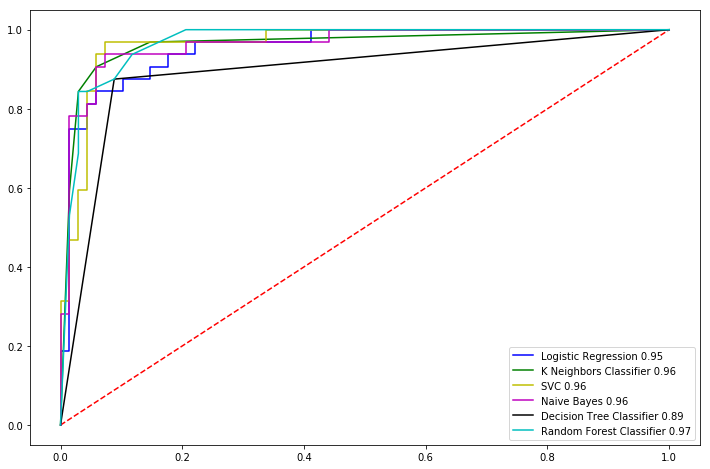

In [33]:
classifiers = [logisticRegression, kNeighborsClassifier, supportVectorClassifier, 
               naiveBayes, decisionTreeClassifier, randomForestClassifier]
names = ['Logistic Regression', 'K Neighbors Classifier', 'SVC', 
               'Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier']
colors = ['b', 'g', 'y', 'm', 'k', 'c']
showRoc(classifiers, names, colors)

We see that Random Forest Classifier performed the best with maximum Area Under Curve.

### CAP Curve

Read about it https://medium.com/@lotass/classification-models-performance-evaluation-c3a91562793

CAP Curve is yet another metric to identify whether the classification model is a good model or not.

Let's consider the present scenario and understand how CAP Curve is built. 
1. We have the total observations as 100. 
2. 32 belong to **class 1** and 68 belong to **class 0**. 

We do CAP Analysis on class 1, i.e. how quickly and in lesser number of attempts can our model identify all 32 **class 1** values.

In [82]:
all_obs = len(test_y)
class_1_count = np.sum(test_y)
class_0_count = all_obs - class_1_count

#### Random Model

First, I draw a random model. It acts as a base model such that if random values are selected, we will eventually identify all the **class 1** values. It is defined as a diagonal from `[0, 0]` to the maximum value along x-axis and **class 1** count along y-axis.

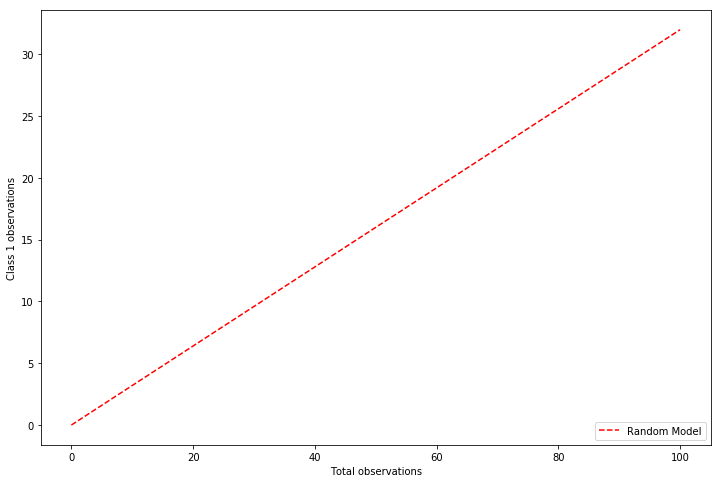

In [86]:
plt.plot([0, all_obs], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
plt.xlabel('Total observations')
plt.ylabel('Class 1 observations')
plt.legend(loc = 'lower right')

#### Perfect Model

A perfect model is one that identifies all the right classes in the first attempt. In our case, it will take the model exactly 32 tries to identify all **class 1** values.
1. We start at (0, 0)
2. For each new value, we will get the correct class 1 label uptil they all are complete. Thus, for 32 observations we will have 32 correct **class 1** predictions. So, we will reach at (class_1_count, class_1_count) i.e. (32, 32)
3. Lastly, for every new value, there will be an increase in total observations only but no more **class 1** labels as we already identified them. So, we will reach the point (all_obs, class_1_count) i.e. (100, 32)

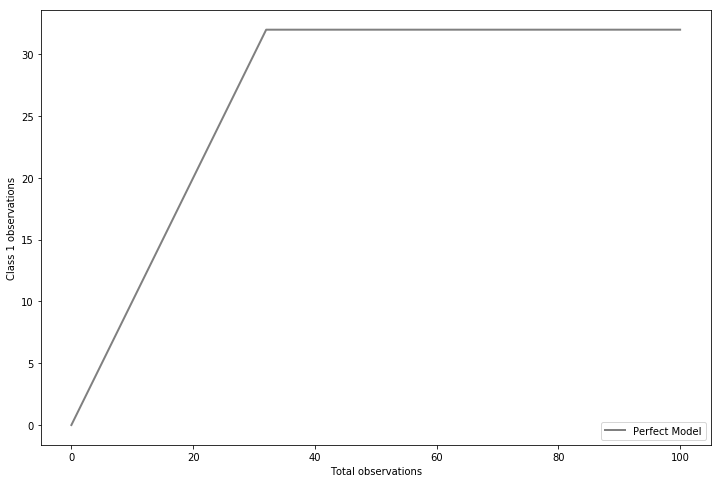

In [95]:
plt.plot([0, class_1_count, all_obs], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth=2, 
         label = 'Perfect Model')
plt.xlabel('Total observations')
plt.ylabel('Class 1 observations')
plt.legend(loc = 'lower right')

#### Predictive Model

Next, I need to analyse the results from the prediction model. Currently, I am using the **Random Forest Classifier**.
1. Predict the probabilities of the test features using `predict_proba`.
2. The result is a set of two columns. The first column is the probability of **class 0** and the second column is the probability of **class 1**. Extract column 2 as it is what we require here.

In [107]:
prob = supportVectorClassifier.predict_proba(test_X)
prob = prob[:, 1]

3. Next, the test labels are sorted based on the above calculated probability values in the reverse order.
4. Append `[0]` in front of these values so that the plot starts from (0, 0).
5. Create a list of x-values for these y-values by creating a range from 0 till the count of observations. If using `numpy.arange`, do add `1` to the end as it ignores the last value.

In [108]:
model_y = [y for _, y in sorted(zip(prob, test_y), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, all_values_count + 1)

6. Plot the x and y values on the graph along with the **Perfect Model** and **Random Model**.

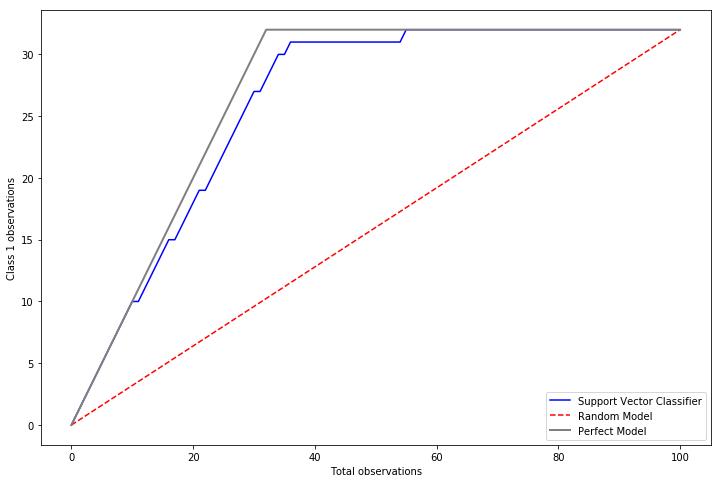

In [110]:
plt.plot(x_values, y_values, c = 'b', label = 'Support Vector Classifier')
plt.plot([0, all_obs], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
plt.plot([0, class_1_count, all_obs], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth=2, 
         label = 'Perfect Model')
plt.xlabel('Total observations')
plt.ylabel('Class 1 observations')
plt.legend(loc = 'lower right')

#### CAP Analysis

Once we have the plot ready, there are two ways to analyse the CAP Curve.
1. Using Area Under Curve
2. Drawing a line at 50% and analysing

##### 1. Using Area Under Curve

1. Calculate the area under the perfect model (aP) till the random model (a).
2. Calculate the area under the prediction model (aR) till the random model (a).
3. Calculate accuracy rate (AR) = aR / aP

The closer the value of AR to 1, the better and vice-versa.

In [111]:
a = auc([0, all_obs], [0, class_1_count])
aP = auc([0, class_1_count, all_obs], [0, class_1_count, class_1_count]) - a
aR = auc(x_values, y_values) - a

print("Accuracy Rate for Support Vector Classifier: {}".format(aR / aP))

Accuracy Rate for Support Vector Classifier: 0.9292279411764706


##### 2. Drawing a line at 50% and analysing
1. Draw a vertical line at 50% from the x-axis uptil it crosses all models.
2. At the point, where it cuts the prediction model, draw a horizontal line such that it cuts the y-axis.
3. Calculate the percentage of the **class 1** identified and the total count of **class 1** labels.

Analyse this percentage as follows:
1. **Less than 60%:** Rubbish Model
2. **60% - 70%:** Poor Model
3. **70% - 80%:** Good Model
4. **80% - 90%:** Very Good Model
5. **More than 90%:** Too Good to be True
In the fifth case, one must always check for overfitting as such a case is very rare otherwise.

Percentage: 96.875%


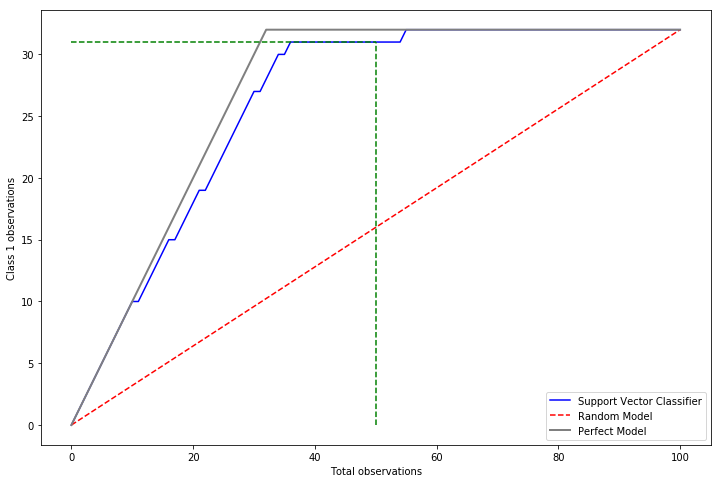

In [120]:
plt.plot(x_values, y_values, c = 'b', label = 'Support Vector Classifier')
plt.plot([0, all_obs], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
plt.plot([0, class_1_count, all_obs], 
         [0, class_1_count, class_1_count], 
         c = 'grey', 
         linewidth=2, 
         label = 'Perfect Model')

# Point where horizontal line will cut prediction model
index = int((50*all_obs / 100))

## 50% Verticcal line from x-axis
plt.plot([50, 50], [0, y_values[index]], c ='g', linestyle = '--')

## Horizontal line to y-axis from prediction model
plt.plot([0, 50], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index] * 100 / max(y_values)
print("Percentage: {}%".format(class_1_observed))

plt.xlabel('Total observations')
plt.ylabel('Class 1 observations')
plt.legend(loc = 'lower right')